# Interact with lerepi

In [1]:
import logging
import numpy as np
import matplotlib.pyplot as plt

from lerepi.core.parser import lerepi_parser
from lerepi.core import handler
import abc
import os
import lerepi
import healpy as hp

from lenscarf.utils import read_map
from plancklens.qcinv import opfilt_pp

class parserclass:
    """An abstract element base type for the parser formalism."""
    __metaclass__ = abc.ABCMeta
parser = parserclass()
module_path = os.path.dirname(lerepi.__file__)
parser.resume = ''
parser.config_file = module_path+'/config/examples/example_c08b.py'

lerepi_handler = handler.handler(parser)
lerepi_handler.collect_jobs()
# lerepi_handler.run()

INFO:lerepi.core.handler:Finished store()
INFO:lerepi.core.handler:Start of collect_jobs()
INFO:lerepi.core.handler:Finished collect_jobs()


MSC: using scarf with 2 OMP threads
could not setup healpix hack. reverting to standard healpy


In [12]:
# newtiniti = np.load('/global/cscratch1/sd/sebibel/cmbs4/08b_00_OBD_MF100_OBDbuilder/OBD_matrix/tniti.npy')
oldtiniti = np.load('/global/project/projectdirs/cmbs4/awg/lowellbb/reanalysis/mapphi_intermediate/s08b/tniti.npy')

(99.0, 101.0)

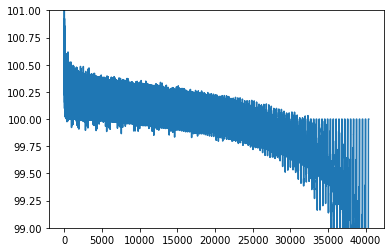

In [31]:
plt.plot(np.diag(newtiniti)/np.diag(oldtiniti))
plt.ylim(99,101)
# plt.plot(np.diag(oldtiniti)*100)

In [2]:
jobs = lerepi_handler.get_jobs()
job = lerepi_handler.init_job(jobs[0])

INFO:lerepi.core.handler:Start of get_jobs()
INFO:lerepi.core.handler:Finished get_jobs()
INFO:lerepi.core.handler:Start of get_jobs()


jit: instantiating ctype = <class 'plancklens.qcinv.multigrid.multigrid_chain'>
creating split preconditioner  ('dense(/global/cscratch1/sd/sebibel/cmbs4/08b_00_MF100_example9/cinv_t/dense.pk)', '64', 'diag_cl')
creating dense preconditioner. (nside = 128, lmax = 64, cache = /global/cscratch1/sd/sebibel/cmbs4/08b_00_MF100_example9/cinv_t/dense.pk)
jit: instantiating ctype = <class 'plancklens.qcinv.opfilt_tt.alm_filter_ninv'>
opfilt_tt: inverse noise map std dev / av = 7.659e-01
 [00:00:07] filling template (4) projection matrix -------> 75%
ninv_ftl: using 2.15 uK-amin noise Cl
DEGRADING WITH NO MARGE MAPS
opfilt_tt: inverse noise map std dev / av = 7.904e-01
 [00:00:00] filling template (4) projection matrix -------> 75%
ninv_ftl: using 2.15 uK-amin noise Cl
computing dense preconditioner:
     lmax  = 64
     ntmpl = 4
 will cache minv in /global/cscratch1/sd/sebibel/cmbs4/08b_00_MF100_example9/cinv_t/dense.pk
 [00:00:45] filling matrix ---------> 99%
   inverting M...
     eigv[ntm

jit: instantiating ctype = <class 'plancklens.qcinv.multigrid.multigrid_chain'>
jit: instantiating ctype = <class 'plancklens.qcinv.opfilt_pp.alm_filter_ninv'>
ninv_febl: using 3.05 uK-amin noise Cl
cinv_p::noiseP_uk_arcmin = 0.659


Caching sky fractions...


INFO:lerepi.core.handler:Finished get_jobs()


In [9]:
job.dlensalot_model.cinv_p.chain.instantiate()
n_inv_filt = util.jit(opfilt_pp.alm_filter_ninv, ninv, transf[0:lmax + 1],
                              b_transf_b=transf_blm, marge_umaps=marge_umaps, marge_qmaps=marge_qmaps)

KeyError: '__jit_args'

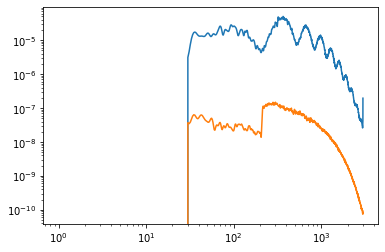

In [4]:
plt.plot(hp.alm2cl(job.dlensalot_model.ivfs.get_sim_emliklm(0)))

plt.plot(hp.alm2cl(job.dlensalot_model.ivfs.get_sim_bmliklm(0)))
plt.xscale('log')
plt.yscale('log')
# job.dlensalot_model.cinv_p

In [19]:
import cmbs4.params.s08b_00.par_s08b00_cILC_4000 as parfile 
# parfile.cinv_p

could not setup healpix hack. reverting to standard healpy
(-0.9500235716501871, -0.5472005208333334)
[-0.9736165659024625, -0.4721687661208586]
inside cinv_p: nside=2048, 2048
inside cinv_p: nside=2048, 2048
inside cinv_p: nside=2048, 2048
inside cinv_p: nside=2048, 2048


In [20]:
print(parfile.ninv_p)
print(parfile.zbounds_len)

[['/global/cscratch1/sd/sebibel/cmbs4/s08b/cILC2021_00_lmax4000/ipvmap.fits']]
[-0.9736165659024625, -0.4721687661208586]


In [33]:
ninv_old = hp.read_map('/global/cscratch1/sd/sebibel/cmbs4/s08b/cILC2021_00_lmax4000/ipvmap.fits')
ninv_new = hp.read_map('/global/cscratch1/sd/sebibel/cmbs4/ninv_test.fits')

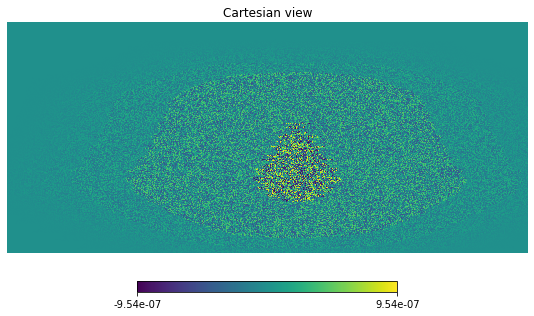

In [44]:
hp.cartview(ninv_old-ninv_new, lonra=[0,90], latra=[-70,-30])
# hp.mollview(ninv_new)

In [45]:
assert np.all(parfile.cinv_p.get_fmask() == job.dlensalot_model.cinv_p.get_fmask())

FileNotFoundError: [Errno 2] No such file or directory: '/global/cscratch1/sd/sebibel/cmbs4/08b_00_MF100_example9/cinv_p/fmask.fits.gz'

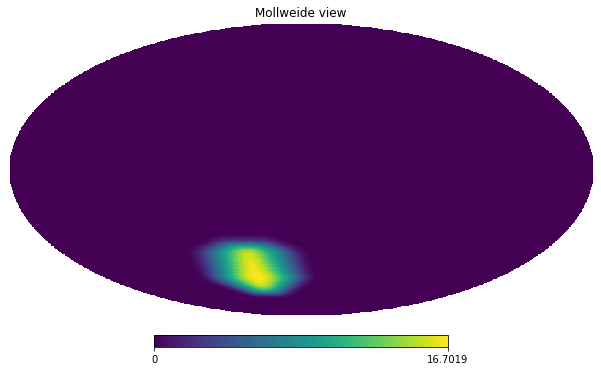

In [23]:
from lenscarf.utils import read_map
hp.mollview(read_map(job.dlensalot_model.cinv_p.ninv))#-read_map(parfile.cinv_p.ninv))

In [29]:
np.allclose(parfile.cinv_p.transf, job.dlensalot_model.cinv_p.transf)

ValueError: operands could not be broadcast together with shapes (4001,) (1101,) 

In [3]:
import lenscarf.utils_sims as us
map_trunc = us.ztrunc_sims(job.dlensalot_model.sims, nside=2048, zbounds_list=[job.dlensalot_model.zbounds])
q_trunc,u_trunc = map_trunc.get_sim_pmap(0)

In [4]:
filt = opfilt_pp.alm_filter_ninv([job.dlensalot_model.ninv_p], job.dlensalot_model.transf_blm,
                 marge_qmaps=(), marge_umaps=())

In [5]:
job.dlensalot_model.cinv_p.__dict__

{'lib_dir': '/global/cscratch1/sd/sebibel/cmbs4/08d_00_rNone_isOBD_MF100_OBDtest2/cinv_p',
 'lmax': 3000,
 'nside': 2048,
 'cl': {'tt': array([0.00000000e+00, 3.15384486e+03, 1.08437306e+03, ...,
         4.73193243e-08, 4.72884497e-08, 4.72312005e-08]),
  'ee': array([0.00000000e+00, 0.00000000e+00, 3.62435072e-02, ...,
         5.94198156e-10, 5.93471562e-10, 5.93194004e-10]),
  'bb': array([0.00000000e+00, 0.00000000e+00, 1.97459570e-06, ...,
         3.76402516e-10, 3.76293414e-10, 3.75748914e-10]),
  'te': array([ 0.00000000e+00,  0.00000000e+00,  2.93875049e+00, ...,
         -7.69387920e-10, -7.68650143e-10, -7.67912762e-10])},
 'transf': array([1.        , 0.99999992, 0.99999976, ..., 0.69566554, 0.69549715,
        0.69532874]),
 'ninv': [[array([8.47641977]),
   '/global/cscratch1/sd/sebibel/cmbs4/08d_ninv_truncified.fits']],
 'n_inv_filt': <plancklens.qcinv.util.jit at 0x155511d5a8d0>,
 'chain': <plancklens.qcinv.util.jit at 0x155511d5a610>}

In [6]:
# ni = hp.read_map('/global/cscratch1/sd/sebibel/cmbs4/08d_rhits_positive_nonan.fits')
# ni_trunc = map_trunc.ztruncify(ni)
# hp.write_map('/global/cscratch1/sd/sebibel/cmbs4/08d_ninv_truncified.fits', ni_trunc)

In [ ]:
q,u = job.dlensalot_model.sims.get_sim_pmap(0)
q_ivf, u_ivf = job.dlensalot_model.cinv_p.apply_ivf([q,u])

(2048, 1100) [00:00:34] (0, 1.00000000)
(2048, 1100) [00:00:52] (1, 0.27590569)
(2048, 1100) [00:01:08] (2, 0.12484242)
(2048, 1100) [00:01:25] (3, 0.07313801)
(2048, 1100) [00:01:44] (4, 0.04922438)
(2048, 1100) [00:02:01] (5, 0.03563043)
(2048, 1100) [00:02:18] (6, 0.02724278)
(2048, 1100) [00:02:34] (7, 0.02149571)
(2048, 1100) [00:02:52] (8, 0.01755546)
(2048, 1100) [00:03:07] (9, 0.01474950)
(2048, 1100) [00:03:25] (10, 0.01266997)
(2048, 1100) [00:03:42] (11, 0.01115660)


In [8]:
# q,u = job.dlensalot_model.sims.get_sim_pmap(0)
# a = job.dlensalot_model.cinv_p.n_inv_filt.__dict__['__jit_obj'].apply_map([q,u])
job.dlensalot_model.cinv_p.n_inv_filt.instantiate()
b = job.dlensalot_model.cinv_p.n_inv_filt.__dict__['__jit_obj'].apply_map([q_trunc,u_trunc])

jit: instantiating ctype = <class 'lenscarf.opfilt.bmodes_ninv.eblm_filter_ninv'>
*** alm_filter_ninv: switching to same ninv_geometry but with unit weights
Loading /global/project/projectdirs/cmbs4/awg/lowellbb/reanalysis/mapphi_intermediate/s08d/tniti.npy


In [6]:
n_inv_not = job.dlensalot_model.cinv_p.n_inv_filt.__dict__['__jit_obj'].__dict__['n_inv']
hp.mollview(n_inv_not[0])

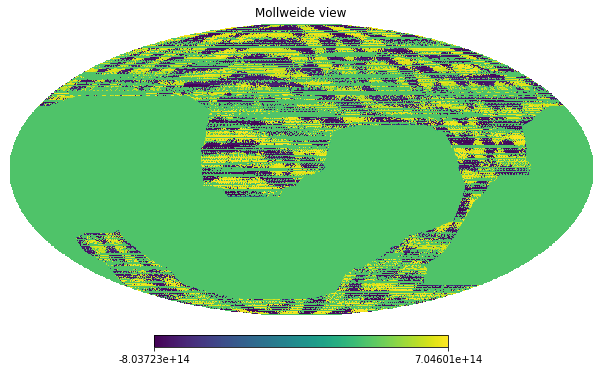

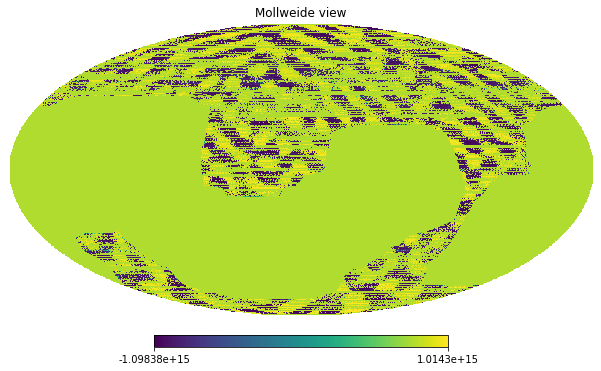

In [22]:
hp.mollview(q, norm='hist')
hp.mollview(u, norm='hist')

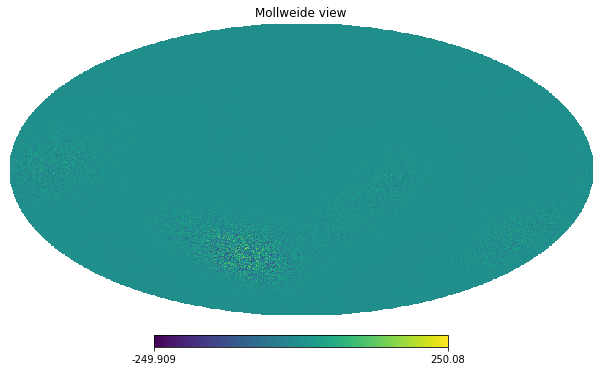

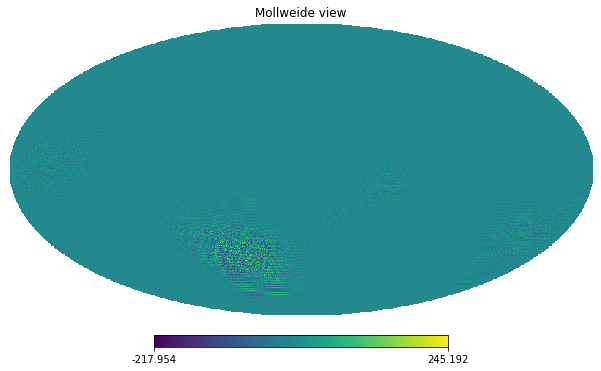

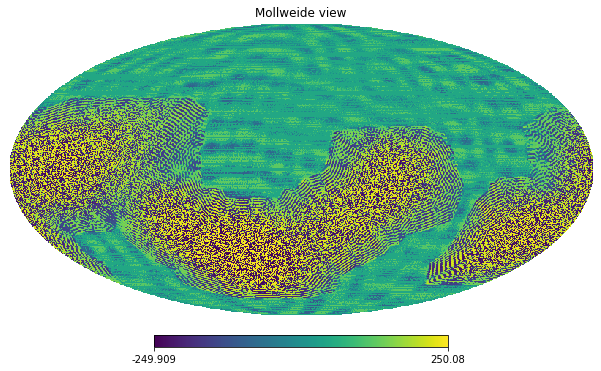

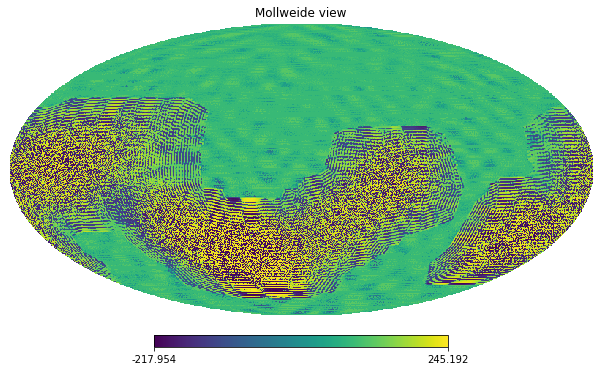

In [23]:
hp.mollview(q_ninv)
hp.mollview(u_ninv)
hp.mollview(q_ninv, norm='hist')
hp.mollview(u_ninv, norm='hist')

In [24]:
from component_separation.MSC.MSC import pospace as ps
cl_ninv = ps.map2cl_spin([q_ninv,u_ninv], mask=mask, lmax=512, spin=2, lmax_mask=1024)
cl_ninv_not = ps.map2cl_spin([q*n_inv_not[0],u*n_inv_not[0]], mask=mask, lmax=512, spin=2, lmax_mask=1024)

In [82]:
from os.path import join as opj
from plancklens import utils
import plancklens
cls_path = opj(os.path.dirname(plancklens.__file__), 'data', 'cls')
cls_len = utils.camb_clfile(opj(cls_path, 'FFP10_wdipole_lensedCls.dat'))
clg_templ = cls_len['ee']
clc_templ = cls_len['bb']
clg_templ[0] = 1e-32
clg_templ[1] = 1e-31
edges = np.array([2, 30, 60, 90, 120, 150, 180, 200, 300, 500, 700, 999])
lib = ps.map2cl_spin_binned(mask_08b, 2, clg_templ[:1000], clc_templ[:1000], edges,  1000)
qumap = lib.map2cl([q,u])

True
Calculating coupling matrix...
zero ww at 53.7 deg
 [00:00:00]  ---------> 90%
 [00:00:00]  ---------> 90%


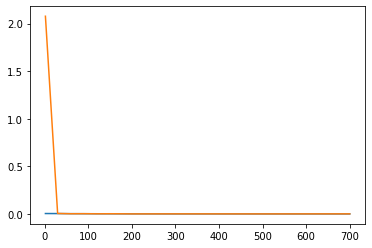

In [90]:
plt.plot([2, 30, 60, 90, 120, 150, 180, 200, 300, 500, 700], qumap[1]*clc_templ[[2, 30, 60, 90, 120, 150, 180, 200, 300, 500, 700]])
plt.plot([2, 30, 60, 90, 120, 150, 180, 200, 300, 500, 700], qumap[0]*clg_templ[[2, 30, 60, 90, 120, 150, 180, 200, 300, 500, 700]])

In [53]:
cl_ninv_08b = ps.map2cl_spin([q_ninv_08b,u_ninv_08b], mask=mask_08b, lmax=512, spin=2, lmax_mask=1024)
cl_ninv_not_08b = ps.map2cl_spin([q*ninv_08b,u*ninv_08b], mask=mask_08b, lmax=512, spin=2, lmax_mask=1024)

*** inverse ww: not all elements > 0
*** inverse ww: not all elements > 0
*** inverse ww: not all elements > 0
*** inverse ww: not all elements > 0


(0.0, 500.0)

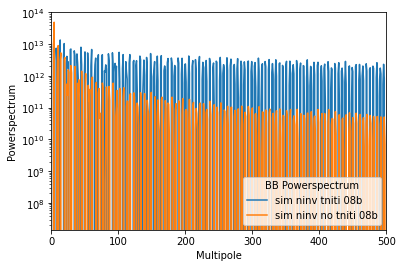

In [58]:
plt.plot(cl_ninv_08b[1], label='sim ninv tniti 08b')
plt.plot(cl_ninv_not_08b[1], label='sim ninv no tniti 08b')
plt.legend(title='BB Powerspectrum')
plt.ylabel('Powerspectrum')
plt.xlabel('Multipole')
plt.yscale('log')
plt.xlim((0,500))

(0.0, 300.0)

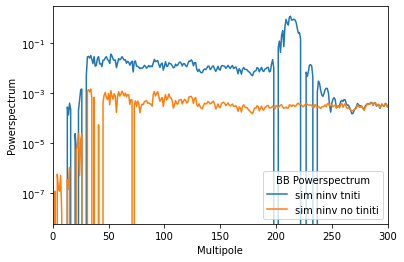

In [56]:
plt.plot(cl_ninv[1], label='sim ninv tniti')
plt.plot(cl_ninv_not[1], label='sim ninv no tiniti')
plt.legend(title='BB Powerspectrum')
plt.ylabel('Powerspectrum')
plt.xlabel('Multipole')
plt.yscale('log')
plt.xlim((0,300))

In [95]:
ninv_cl = ps.map2cl(n_inv_not[0], mask=mask, lmax=512, lmax_mask=1024)
ninv_cl_msk0 = ps.map2cl(n_inv_not[0], mask=mask_0, lmax=512, lmax_mask=1024)
# fg='00'
# mask_08b = hp.read_map('/project/projectdirs/cmbs4/awg/lowellbb/reanalysis/foreground_cleaned_maps/08b.%s_umilta_210511/ILC_mask_08b_smooth_30arcmin.fits'%fg)
# ninv_cl_08b = ps.map2cl(s08b_ninv, mask=mask_08b, lmax=512, lmax_mask=1024)

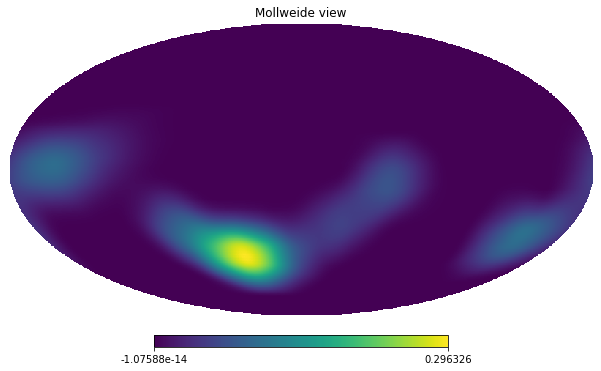

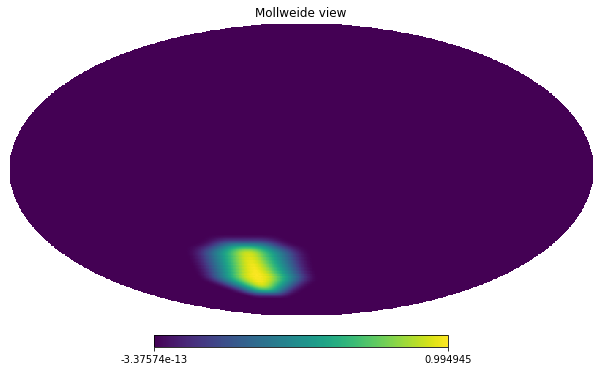

In [34]:
hp.mollview(mask)
hp.mollview(mask_08b)

(0.0, 500.0)

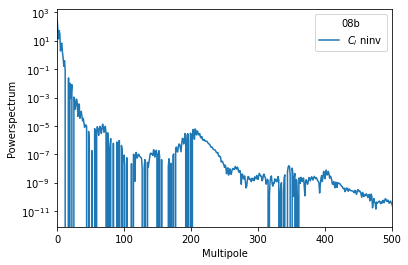

In [101]:
# plt.plot(ninv_cl, label='ninv 08d')
plt.plot(ninv_cl_msk0, label='$C_l$ ninv')
# plt.plot(ninv_cl_08b, label='ninv 08b')
plt.legend(title='08b')
plt.ylabel('Powerspectrum')
plt.xlabel('Multipole')
plt.yscale('log')
plt.xlim((0,500))

In [7]:
# ith = job.get_ith_sim(0)

KeyboardInterrupt: 